In [1]:
from modelo_tweets import *
import itertools

In /u01/user8/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /u01/user8/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /u01/user8/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /u01/user8/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /u01/user8/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-d

In [2]:
partidos=pd.read_csv('entradas/Partidos.csv')
manifestaciones=pd.read_csv('entradas/Manifestaciones.csv')
f_especiales=pd.read_csv('entradas/FechasEspeciales.csv')

partidos_M=pd.to_datetime(partidos['Fecha'].dropna())
partidos_S=pd.to_datetime(partidos['Fecha.1'].dropna())
manifestaciones=pd.to_datetime(manifestaciones['Fecha'].dropna())
f_especiales=pd.to_datetime(f_especiales[['2019','2020']].values.flatten())
f_especiales=f_especiales[~f_especiales.isna()]

def TC(t):
    return np.array([
                     (pd.Timestamp(t.date()) == partidos_M).sum(),
                     (pd.Timestamp(t.date()) == partidos_S).sum(),
                     (pd.Timestamp(t.date()) == manifestaciones).sum(),
                     (pd.Timestamp(t.date()) == f_especiales).sum(),
                     t.weekday()/6.0,
                     (t.hour > 12)*1,
                     1
                    ])

In [3]:
with open('entradas/data_tweets.pickle', 'rb') as handle:
    data = pickle.load(handle)

In [185]:
# time series split
splits=[
        [('2019-04-01 00:00','2019-05-01 00:00'),
         ('2019-05-01 00:00','2019-05-15 00:00')],
        [('2019-04-01 00:00','2019-05-15 00:00'),
         ('2019-05-15 00:00','2019-06-01 00:00')],
        [('2019-04-01 00:00','2019-06-01 00:00'),
         ('2019-06-01 00:00','2019-06-15 00:00')],    
        [('2019-04-01 00:00','2019-06-15 00:00'),
         ('2019-06-15 00:00','2019-07-01 00:00')],    
        [('2019-04-01 00:00','2019-07-01 00:00'),
         ('2019-07-01 00:00','2019-07-15 00:00')],   
        [('2019-04-01 00:00','2019-07-15 00:00'),
         ('2019-07-15 00:00','2019-08-01 00:00')],     
        [('2019-04-01 00:00','2019-08-01 00:00'),
         ('2019-08-01 00:00','2019-08-15 00:00')],    
        [('2019-04-01 00:00','2019-08-15 00:00'),
         ('2019-08-15 00:00','2019-09-01 00:00')],   
        [('2019-04-01 00:00','2019-09-01 00:00'),
         ('2019-09-01 00:00','2019-09-15 00:00')],  
        [('2019-04-01 00:00','2019-09-15 00:00'),
         ('2019-10-15 00:00','2019-10-01 00:00')],    
        [('2019-04-01 00:00','2019-10-01 00:00'),
         ('2019-10-01 00:00','2019-10-15 00:00')],   
        [('2019-04-01 00:00','2019-10-15 00:00'),
         ('2019-10-15 00:00','2019-11-01 00:00')],    
        [('2019-04-01 00:00','2019-11-01 00:00'),
         ('2019-11-01 00:00','2019-11-15 00:00')],    
        [('2019-04-01 00:00','2019-11-15 00:00'),
         ('2019-11-15 00:00','2019-12-01 00:00')], 
        [('2019-04-01 00:00','2019-12-01 00:00'),
         ('2019-12-01 00:00','2019-12-15 00:00')],     
        [('2019-04-01 00:00','2019-12-15 00:00'),
         ('2019-12-15 00:00','2020-01-01 00:00')],     
        ]

# blocking time series split
splits=[
        [('2019-04-01 00:00','2019-05-01 00:00'),
         ('2019-05-01 00:00','2019-05-15 00:00')],
        [('2019-04-15 00:00','2019-05-15 00:00'),
         ('2019-05-15 00:00','2019-06-01 00:00')],
        [('2019-05-01 00:00','2019-06-01 00:00'),
         ('2019-06-01 00:00','2019-06-15 00:00')],    
        [('2019-05-15 00:00','2019-06-15 00:00'),
         ('2019-06-15 00:00','2019-07-01 00:00')],    
        [('2019-06-01 00:00','2019-07-01 00:00'),
         ('2019-07-01 00:00','2019-07-15 00:00')],   
        [('2019-06-15 00:00','2019-07-15 00:00'),
         ('2019-07-15 00:00','2019-08-01 00:00')],     
        [('2019-07-01 00:00','2019-08-01 00:00'),
         ('2019-08-01 00:00','2019-08-15 00:00')],    
        [('2019-07-15 00:00','2019-08-15 00:00'),
         ('2019-08-15 00:00','2019-09-01 00:00')],   
        [('2019-08-01 00:00','2019-09-01 00:00'),
         ('2019-09-01 00:00','2019-09-15 00:00')],  
        [('2019-08-15 00:00','2019-09-15 00:00'),
         ('2019-10-15 00:00','2019-10-01 00:00')],    
        [('2019-09-01 00:00','2019-10-01 00:00'),
         ('2019-10-01 00:00','2019-10-15 00:00')],   
        [('2019-09-15 00:00','2019-10-15 00:00'),
         ('2019-10-15 00:00','2019-11-01 00:00')],    
        [('2019-10-01 00:00','2019-11-01 00:00'),
         ('2019-11-01 00:00','2019-11-15 00:00')],    
        [('2019-10-15 00:00','2019-11-15 00:00'),
         ('2019-11-15 00:00','2019-12-01 00:00')], 
        [('2019-11-01 00:00','2019-12-01 00:00'),
         ('2019-12-01 00:00','2019-12-15 00:00')],     
        [('2019-11-15 00:00','2019-12-15 00:00'),
         ('2019-12-15 00:00','2020-01-01 00:00')],     
        ]

In [ ]:
results_by_split={}
for split in splits:
    train_period,validate_period=split
    print(train_period,validate_period)
    results={}
    results_cum={}
    for j in range(1,7):
        for i in list(itertools.combinations(np.arange(6),j)):
            print(i,np.array(i+(6,)))
            func = lambda x: TC(x)[np.array(i+(6,))]

            model=modelTweets(data,
                      train_period,
                      validate_period,
                      f_covariates=(func,restore_date),
                      followers_rate=4,
                      win_size_pred_period=1
                     )
            model.train()
            model.compute_lambda_predict()
            model.compute_errors()
            results[i]=model.errors_predict
            results_cum[i]=model.errors_predict_cum
    results_by_split[(train_period,validate_period)]=[results,results_cum]

In [2]:
with open('errors_covariados.pickle', 'rb') as f:
    x = pickle.load(f)

<AxesSubplot:xlabel="('MAE', 'mean')", ylabel="('Combination', '')">

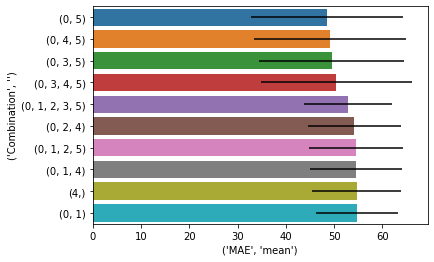

In [64]:
values=[]
for idx,period in enumerate(x):
    for comb in x[period][0]:
        values.append([idx,comb,x[period][0][comb]['MAE']])
MAE=pd.DataFrame(values,columns=['Period','Combination','MAE'])
MAE=MAE.groupby('Combination').agg({'MAE':['mean','std']}).reset_index()
MAE=MAE.sort_values(('MAE','mean'))
sns.barplot(data=MAE.head(10),y=('Combination',''),x=('MAE','mean'),xerr=MAE[('MAE','std')].head(10).values)

In [65]:
MAE

Combination         MAE            
                           mean         std
31           (0, 5)   48.570972   15.802359
30        (0, 4, 5)   49.171733   15.705625
28        (0, 3, 5)   49.460980   15.045487
27     (0, 3, 4, 5)   50.487379   15.582704
6   (0, 1, 2, 3, 5)   52.874510    9.133553
..              ...         ...         ...
58        (3, 4, 5)   76.884102   14.636005
57           (3, 4)  134.480985   73.448132
56             (3,)  134.900229   72.032587
39     (1, 2, 4, 5)  149.094805  229.627474
40        (1, 2, 5)  158.981242  252.685035

[63 rows x 3 columns]

<AxesSubplot:xlabel="('RMSE', 'mean')", ylabel="('Combination', '')">

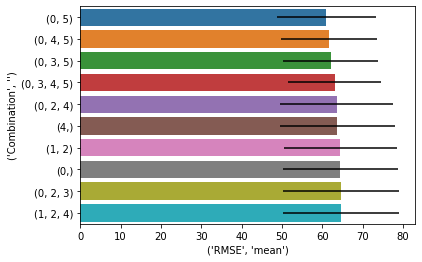

In [44]:
values=[]
for idx,period in enumerate(x):
    for comb in x[period][0]:
        values.append([idx,comb,x[period][0][comb]['RMSE']])
MAE=pd.DataFrame(values,columns=['Period','Combination','RMSE'])
MAE=MAE.groupby('Combination').agg({'RMSE':['mean','std']}).reset_index()
MAE=MAE.sort_values(('RMSE','mean'))
sns.barplot(data=MAE.head(10),y=('Combination',''),x=('RMSE','mean'),xerr=MAE[('RMSE','std')].head(10).values)

<AxesSubplot:xlabel="('Pearson', 'mean')", ylabel="('Combination', '')">

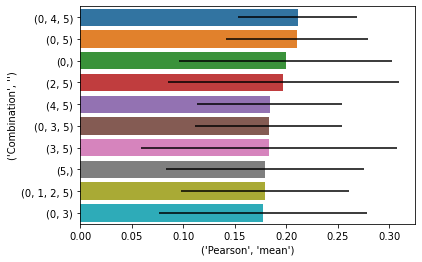

In [49]:
values=[]
for idx,period in enumerate(x):
    for comb in x[period][0]:
        values.append([idx,comb,x[period][0][comb]['Pearson']])
MAE=pd.DataFrame(values,columns=['Period','Combination','Pearson'])
MAE=MAE.groupby('Combination').agg({'Pearson':['mean','std']}).reset_index()
MAE=MAE.sort_values(('Pearson','mean'),ascending=False)
sns.barplot(data=MAE.head(10),y=('Combination',''),x=('Pearson','mean'),xerr=MAE[('Pearson','std')].head(10).values)

<AxesSubplot:xlabel="('MAPE', 'mean')", ylabel="('Combination', '')">

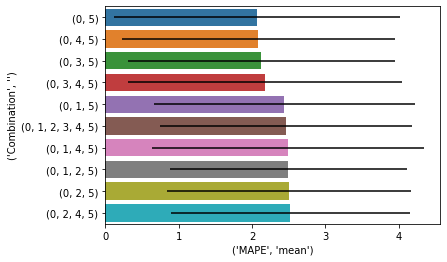

In [53]:
values=[]
for idx,period in enumerate(x):
    for comb in x[period][1]:
        values.append([idx,comb,x[period][1][comb]['MAPE']])
MAE=pd.DataFrame(values,columns=['Period','Combination','MAPE'])
MAE=MAE.groupby('Combination').agg({'MAPE':['mean','std']}).reset_index()
MAE=MAE.sort_values(('MAPE','mean'))
sns.barplot(data=MAE.head(10),y=('Combination',''),x=('MAPE','mean'),xerr=MAE[('MAPE','std')].head(10).values)

In [54]:
MAE

Combination      MAPE          
                      mean       std
31        (0, 5)  2.066377  1.944612
30     (0, 4, 5)  2.082168  1.861113
28     (0, 3, 5)  2.126666  1.824628
27  (0, 3, 4, 5)  2.174840  1.870193
16     (0, 1, 5)  2.441724  1.777199
..           ...       ...       ...
59        (3, 5)  3.437553  1.600874
39  (1, 2, 4, 5)  3.969299  4.395442
40     (1, 2, 5)  4.095776  4.676686
57        (3, 4)  5.360806  1.393505
56          (3,)  5.382245  1.518971

[63 rows x 3 columns]

<AxesSubplot:xlabel="('RMSE', 'mean')", ylabel="('Combination', '')">

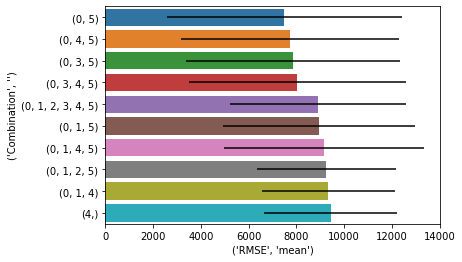

In [55]:
values=[]
for idx,period in enumerate(x):
    for comb in x[period][1]:
        values.append([idx,comb,x[period][1][comb]['RMSE']])
MAE=pd.DataFrame(values,columns=['Period','Combination','RMSE'])
MAE=MAE.groupby('Combination').agg({'RMSE':['mean','std']}).reset_index()
MAE=MAE.sort_values(('RMSE','mean'))
sns.barplot(data=MAE.head(10),y=('Combination',''),x=('RMSE','mean'),xerr=MAE[('RMSE','std')].head(10).values)

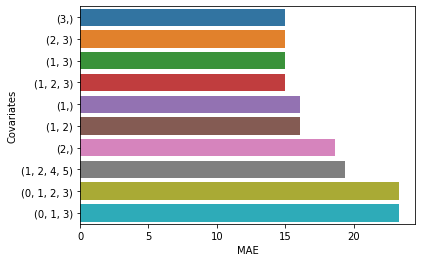

In [217]:
MAE=pd.DataFrame({'Covariates':list(x.keys()),'MAE':[x[i]['MAE'] for i in x]}).sort_values('MAE')
# plt.figure(figsize=(10,12))
sns.barplot(data=MAE.head(10),x='MAE',y='Covariates')
plt.savefig('results/figures/MAE.pdf',bbox_inches = 'tight')

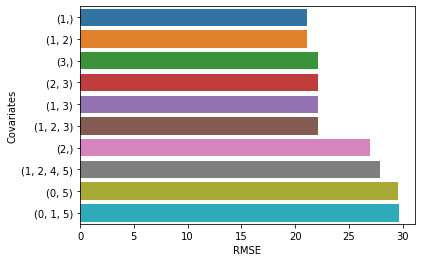

In [219]:
RMSE=pd.DataFrame({'Covariates':list(x.keys()),'RMSE':[x[i]['RMSE'] for i in x]}).sort_values('RMSE')
# plt.figure(figsize=(10,12))
sns.barplot(data=RMSE.head(10),x='RMSE',y='Covariates')
plt.savefig('results/figures/RMSE.pdf',bbox_inches = 'tight')

,Covariates,Pearson
52,"(1, 2, 3, 5)",0.320981
17,"(2, 5)",0.320981
5,"(5,)",0.320981
19,"(3, 5)",0.320981
38,"(2, 3, 5)",0.320981
...,...,...
42,"(0, 1, 2, 4)",0.013467
23,"(0, 1, 4)",0.011516
28,"(0, 3, 4)",0.010798
26,"(0, 2, 4)",0.009859


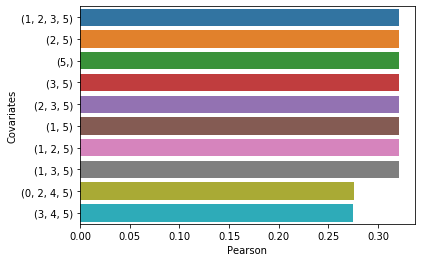

In [235]:
Pearson=pd.DataFrame({'Covariates':list(x.keys()),'Pearson':[abs(x[i]['Pearson'][0]) for i in x]}).sort_values('Pearson',ascending=False)
# plt.figure(figsize=(10,12))
sns.barplot(data=Pearson.head(10),x='Pearson',y='Covariates')
plt.savefig('results/figures/Pearson.pdf',bbox_inches = 'tight')
Pearson

In [199]:
with open('errors_cum_cov.pickle', 'rb') as f:
    y = pickle.load(f)

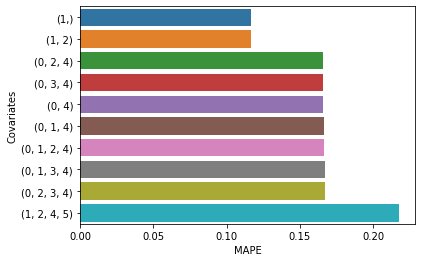

In [224]:
MAE=pd.DataFrame({'Covariates':list(y.keys()),'MAPE':[y[i]['MAPE'] for i in y]}).sort_values('MAPE')
# plt.figure(figsize=(10,12))
sns.barplot(data=MAE.head(10),x='MAPE',y='Covariates')
plt.savefig('results/figures/MAPE_cumm.pdf',bbox_inches = 'tight')

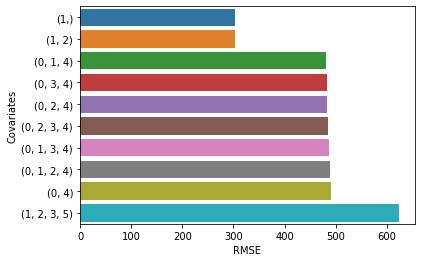

In [226]:
RMSE=pd.DataFrame({'Covariates':list(y.keys()),'RMSE':[y[i]['RMSE'] for i in y]}).sort_values('RMSE')
# plt.figure(figsize=(10,12))
sns.barplot(data=RMSE.head(10),x='RMSE',y='Covariates')
plt.savefig('results/figures/RMSE_cumm.pdf',bbox_inches = 'tight')

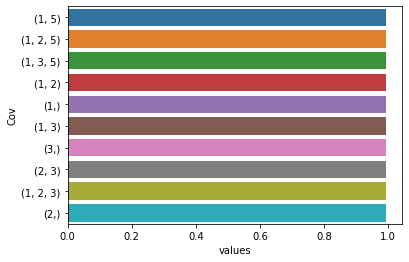

In [209]:
Pearson=pd.DataFrame({'Cov':list(y.keys()),'values':[abs(y[i]['Pearson'][0]) for i in y]}).sort_values('values')
# plt.figure(figsize=(10,12))
sns.barplot(data=Pearson.tail(10),x='values',y='Cov')